# Multiple Linear Regression
developer: Mohammad mehdi Sahraei
***
[maktabkhooneh](https://maktabkhooneh.org/course/%DB%8C%D8%A7%D8%AF%DA%AF%DB%8C%D8%B1%DB%8C-%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-mk1318/)


### Importing Needed packages

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data with pandas

- taking a look at the dataset and analyzing data

In [5]:
df = pd.read_csv("data.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [6]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

### Data Exploration

In [7]:
#data summary 
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [8]:
df['Area'].value_counts()

75                 111
100                104
60                  95
90                  95
105                 92
                  ... 
177                  1
221                  1
680                  1
 8,400,000,000       1
312                  1
Name: Area, Length: 243, dtype: int64

### Data Cleaning
- dropping

In [9]:
df = df.drop('Address', axis='columns')
print ("Shape of dataset before cleaning: ", df.shape)
# df.head(10)

Shape of dataset before cleaning:  (3479, 7)


In [10]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Price','Price(USD)']]
# cdf.head(10)

- Because there are unusable data in the area column, we must clear the data

In [11]:
cell_df = cdf[pd.to_numeric(cdf['Area'], errors='coerce').notnull()]
cell_df['Area'] = cell_df['Area'].astype('int')
cell_df.index = range(len(cell_df)) # giving-Index-anew
# cell_df.shape

/tmp/ipykernel_4662/2633933251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['Area'] = cell_df['Area'].astype('int')


- Because some data columns are not continuous type, we have to make them numerical and continuous

In [12]:
#First we should convert pd to np 
data = cell_df[['Area','Room','Parking','Warehouse','Elevator','Price','Price(USD)']].values

print(data[:4])

[[63 1 True True True 1850000000.0 61666.67]
 [60 1 True True True 1850000000.0 61666.67]
 [79 2 True True True 550000000.0 18333.33]
 [95 2 True True True 902500000.0 30083.33]]


In [13]:
from sklearn import preprocessing

#We must convert these Values to numerical values
pa_ = preprocessing.LabelEncoder()
pa_.fit([True,False])
data[:,2] = pa_.transform(data[:,2]) 


Ware_ = preprocessing.LabelEncoder()
Ware_.fit([True,False])
data[:,3] = Ware_.transform(data[:,3])


El_ = preprocessing.LabelEncoder()
El_.fit([True,False])
data[:,4] = El_.transform(data[:,4]) 

In [14]:
data[:10]

array([[63, 1, 1, 1, 1, 1850000000.0, 61666.67],
       [60, 1, 1, 1, 1, 1850000000.0, 61666.67],
       [79, 2, 1, 1, 1, 550000000.0, 18333.33],
       [95, 2, 1, 1, 1, 902500000.0, 30083.33],
       [123, 2, 1, 1, 1, 7000000000.0, 233333.33],
       [70, 2, 1, 1, 0, 2050000000.0, 68333.33],
       [87, 2, 1, 1, 1, 600000000.0, 20000.0],
       [59, 1, 1, 1, 1, 2150000000.0, 71666.67],
       [54, 2, 1, 1, 0, 493000000.0, 16433.33],
       [71, 1, 1, 1, 1, 2370000000.0, 79000.0]], dtype=object)

### converting np to pd

In [15]:
cell_df = pd.DataFrame(data, columns = ['Area','Room','Parking','Warehouse','Elevator','Price','Price(USD)'])
# cell_df.head()

In [16]:
cell_df.dtypes

Area          object
Room          object
Parking       object
Warehouse     object
Elevator      object
Price         object
Price(USD)    object
dtype: object

- converting a column to int or float or etc

In [17]:
cell_df['Area'] = cell_df['Area'].astype('int')
cell_df['Room'] = cell_df['Room'].astype('int')
cell_df['Parking'] = cell_df['Parking'].astype('int')
cell_df['Warehouse'] = cell_df['Warehouse'].astype('int')
cell_df['Elevator'] = cell_df['Elevator'].astype('int')
cell_df['Price'] = cell_df['Price'].astype('float64')
cell_df['Price(USD)'] = cell_df['Price(USD)'].astype('float64')

### A more concise view of the data

In [18]:
set_group = cell_df.groupby(['Area'])

In [19]:
set_group.get_group(50)[:5]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
132,50,1,0,1,0,3.400000e+08,11333.33
557,50,1,0,1,0,1.260000e+09,42000.00
728,50,1,1,1,1,1.500000e+09,50000.00
736,50,1,1,1,0,1.750000e+09,58333.33
746,50,1,1,1,1,1.200000e+09,40000.00


In [20]:
cell_df.dtypes

Area            int64
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Price         float64
Price(USD)    float64
dtype: object

### data histogram

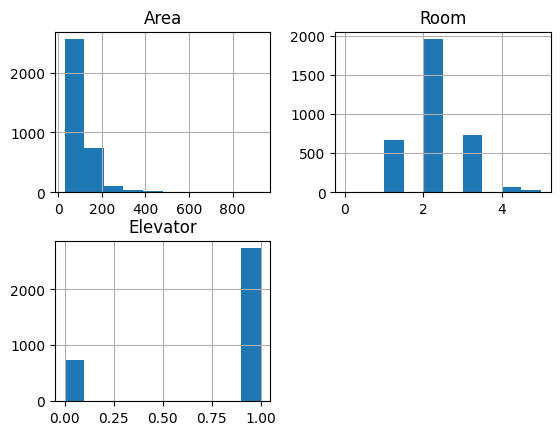

In [21]:
df_hist = cell_df[['Area','Room','Elevator']]
df_hist.hist()
plt.show()

### drawing plot and scatter

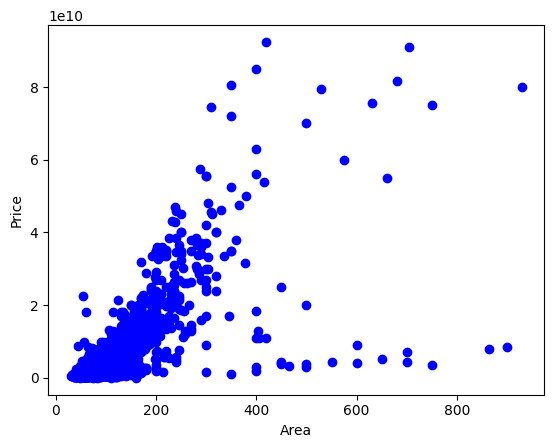

In [22]:
plt.scatter(cell_df.Area, cell_df.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

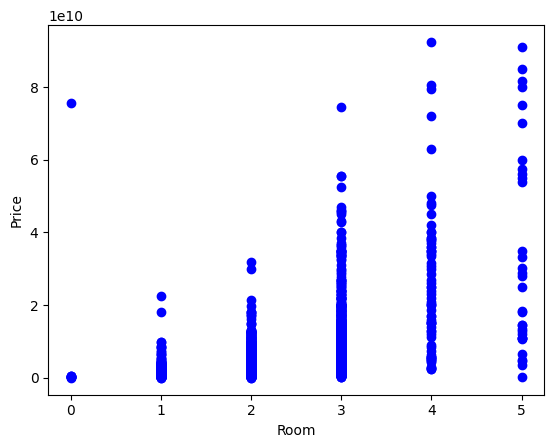

In [23]:
plt.scatter(cell_df.Room, cell_df.Price,  color='blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

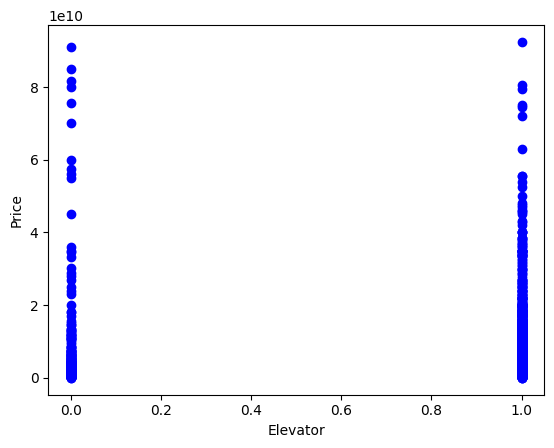

In [24]:
plt.scatter(cell_df.Elevator, cell_df.Price,  color='blue')
plt.xlabel("Elevator")
plt.ylabel("Price")
plt.show()

### Creating train and test dataset
#### 20 % for test and 80 for train

In [122]:
msk = np.random.rand(len(cell_df)) < 0.84

train = cell_df[msk]
test = cell_df[~msk]

### training  model

- Converting the data into a normal array So that it is suitable for the model format

- [link regr](https://scikit-learn.org/stable/supervised_learning.html)

In [123]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

#asanyarray: converting to normal array 
train_x = np.asanyarray(train[['Area','Room','Elevator']])
train_y = np.asanyarray(train[['Price']])

#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[7.41731383e+07 1.34781357e+09 1.45386809e+09]]
Intercept:  [-6.50745799e+09]


### final Plot and scatter 
- fitting line
- regr.coef_: θ1 | regr.intercept_: θ0 | train_x: x
- formula: y = θ0+ θ1*x

Text(0, 0.5, 'Price')

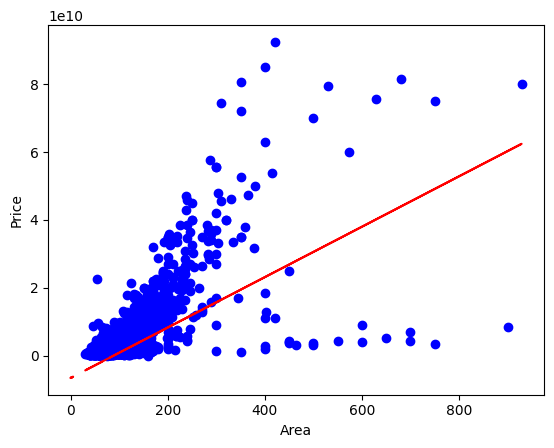

In [124]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")

### model Evaluation
-  absolute: ghadre motlagh

In [125]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area','Room','Elevator']])
test_y = np.asanyarray(test[['Price']])
predict = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predict) )

Mean absolute error: 2731600708.81
Residual sum of squares (MSE): 24749057526247604224.00
R2-score: 0.61


In [126]:
print(predict[:5],'\n')
print(test_y[:5])

[[4.68848538e+09]
 [1.38028883e+09]
 [3.35336889e+09]
 [6.76533325e+09]
 [2.86375160e+09]] 

[[9.025e+08]
 [2.050e+09]
 [1.771e+09]
 [4.059e+09]
 [1.500e+09]]
